#  Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
meal_info=pd.read_csv('D:\\CAPSTONE PROJECT\\meal_info.csv')  # meal_info csv dataset
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [3]:
fulfilment_center_info=pd.read_csv('D:\\CAPSTONE PROJECT\\fulfilment_center_info.csv') # fulfilment_center_info csv dataset
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [4]:
train=pd.read_csv('D:\\CAPSTONE PROJECT\\train.csv') # train csv dataset
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


# Merging dataset

In [5]:
train=train.merge(fulfilment_center_info,on='center_id') # merging train and fulfilment dataset on center_id ....How = inner join
data=train.merge(meal_info,on='meal_id')# merging train dataset with meal_info on meal_id ... how = inner
data.head() # complete dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [7]:
data['checkout_price'].cov(data['base_price'])

23434.157890478582

In [70]:
data.info() # checking info of our dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [7]:
data.nunique() # checking the unique values of each features in our dataset here 0=index 1=columns

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
dtype: int64

In [8]:
data.shape # checking the number of rows and columns..
print('The number of rows are ',data.shape[0])
print('\nThe number of features are ',data.shape[1])

The number of rows are  456548

The number of features are  15


In [9]:
data.describe() # The Five point summary of our dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000



#  Checking Null values

In [10]:
data.isnull().sum() # checking null values in our dataset

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

## checking correlation between features

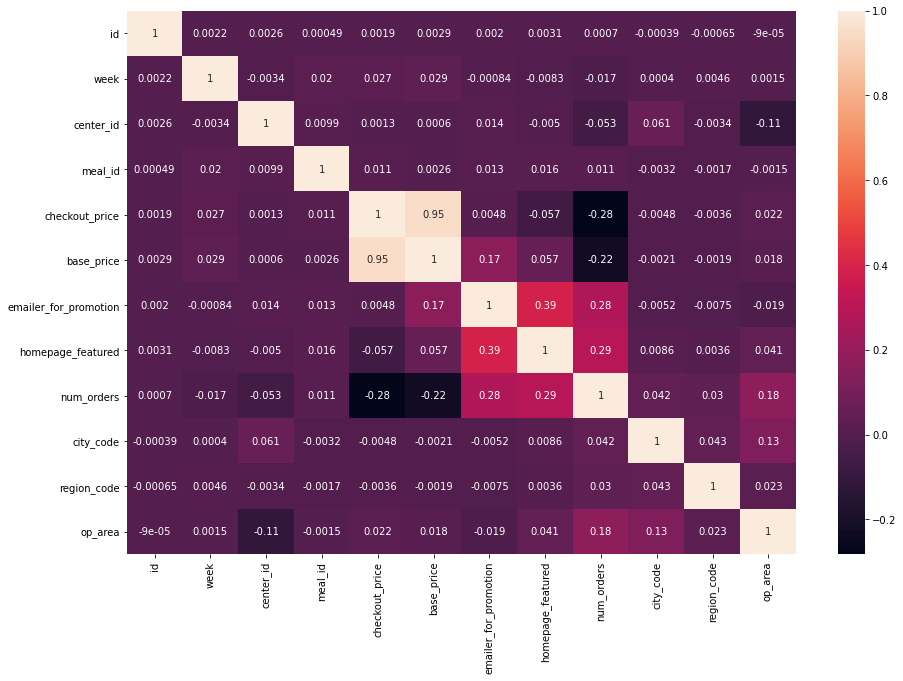

In [11]:
plt.figure(figsize=(15,10)) # size of our Heatmap plot
sns.heatmap(data.corr(),annot=True) # correlation plot using heatmap
plt.show()

##### checkout_price is highly correlated with base_price

###  checking correlation using VIF (variance inflation factor) 1/(1-R2)

In [12]:
num_data = data.select_dtypes(np.number) # taking only numerical data in new variable

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    # VIF can be found only for numerical data
vif_data=pd.DataFrame()
vif_data['vif']=[variance_inflation_factor(num_data.values,i) for i in range(len(num_data.columns))]
vif_data['features']=num_data.columns

In [14]:
vif_data.sort_values(by='vif',ascending=False) # sorting vif in decending orders

,vif,features
5,96.787442,base_price
4,92.138183,checkout_price
9,54.773930,city_code
0,47.072657,id
11,15.594389,op_area
3,13.714651,meal_id
10,10.888187,region_code
2,4.227009,center_id
1,4.190665,week
8,1.857933,num_orders


#### vif beyond 10 is not good as it shows features are highly correlated with each other

## understanding dataset in business perspective

## i) Number of orders per week

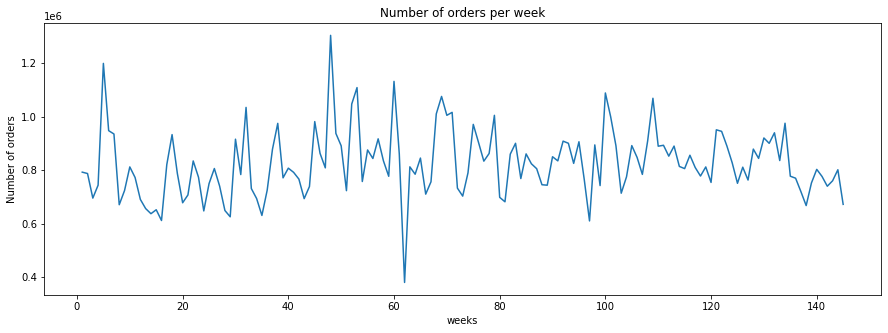

In [15]:
week=data.groupby(['week'])['num_orders'].sum() # grouping week and suming num_orders 
week=pd.DataFrame(week)
week=week.reset_index()


## ploting of week V/S num_orders 

plt.figure(figsize=(15,5))
sns.lineplot(x='week',y='num_orders',data=week)
plt.title('Number of orders per week')
plt.xlabel('weeks')
plt.ylabel('Number of orders')
plt.show()

###### Highest orders recieved are approximately in 50th week.
###### There was drastic drop in number of orders between 60 to 70 week

## ii) Number of orders per center id

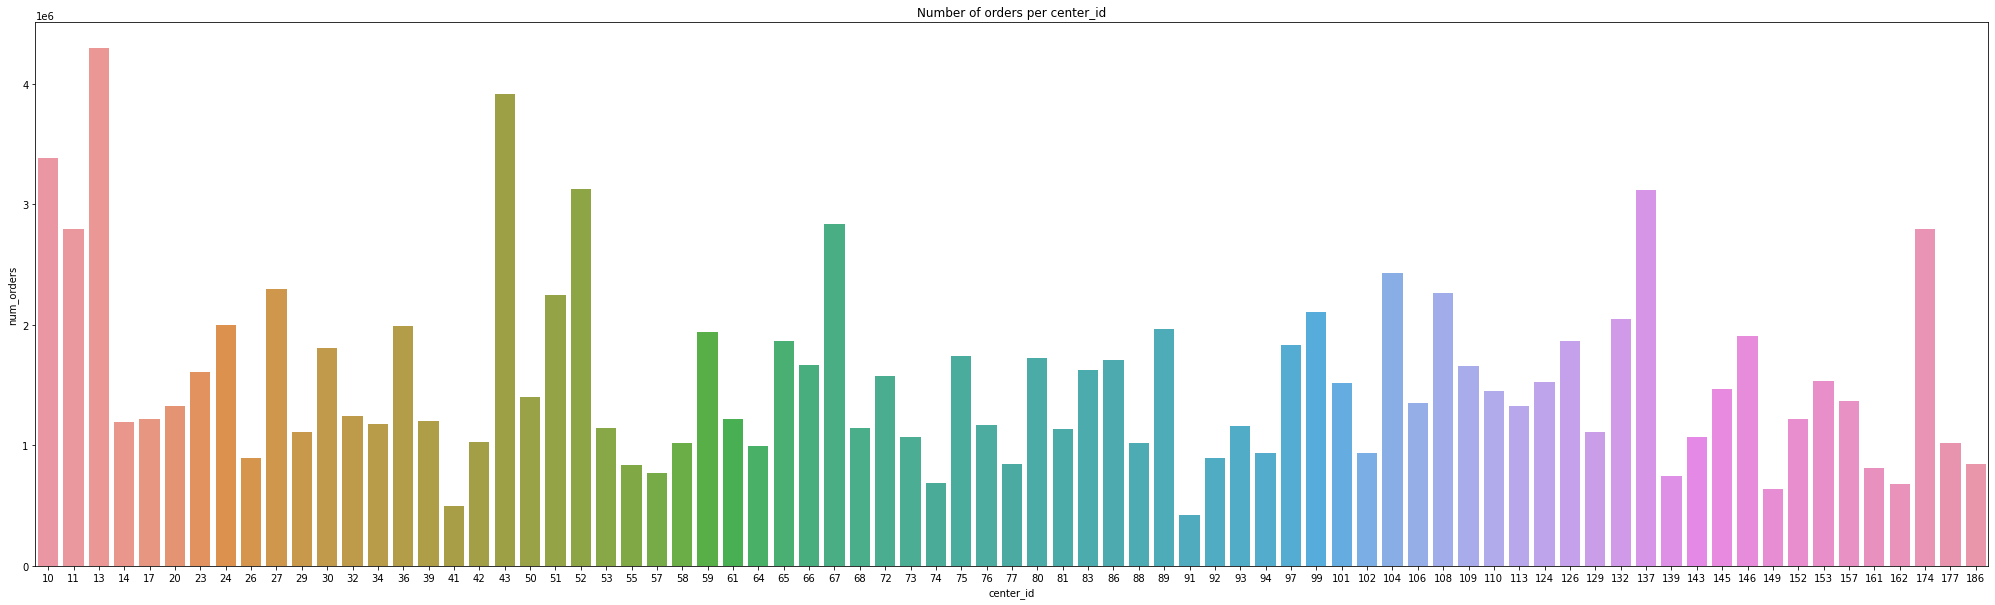

In [25]:
center=data.groupby(['center_id'])['num_orders'].sum() # grouping center id and suming num_orders 
center=pd.DataFrame(center)
center=center.reset_index()


## ploting center ID V/S num_orders
 
plt.figure(figsize=(35,10))
sns.barplot(x='center_id',y='num_orders',data=center)
plt.title('Number of orders per center_id')
plt.xlabel('center_id')
plt.ylabel('num_orders')
plt.show()

##### Highest order was recieved from center id 13 and lowest were recieved from 41 and 91

## iii) Number of orders based on cuisine and category

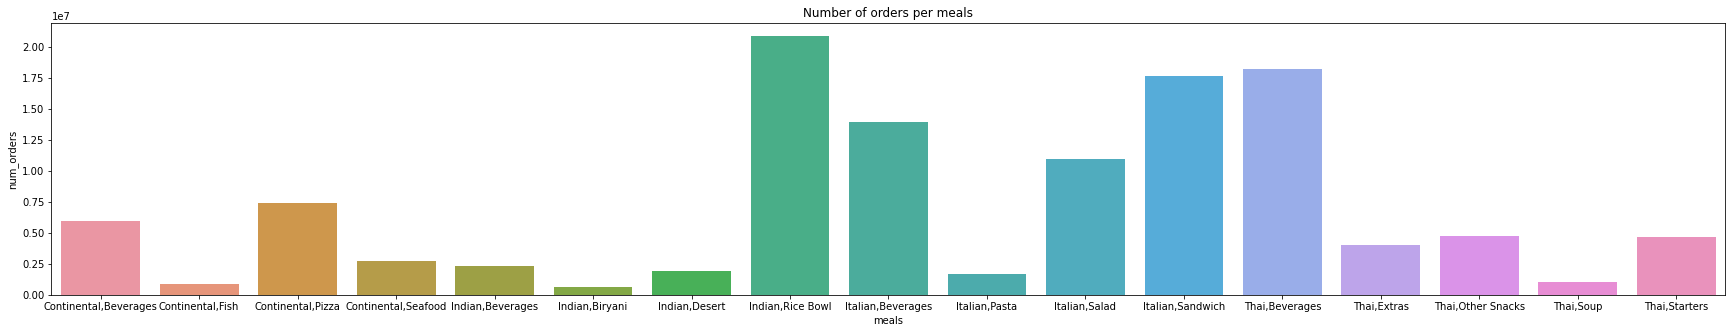

In [26]:
meal=data.groupby(['cuisine','category'])['num_orders'].sum() # grouping cuisine and category and suming num_orders
meal=pd.DataFrame(meal)
meal=meal.reset_index()
meal['meals']=meal.apply(lambda x:x['cuisine']+','+x['category'],axis=1)
meal

## ploting meals V/S num_orders

plt.figure(figsize=(30,5))
sns.barplot(x='meals',y='num_orders',data=meal)
plt.title('Number of orders per meals')
plt.xlabel('meals')
plt.ylabel('num_orders')
plt.show()

#### Indian (Rice Bowl), Italian (Beverages), italian (Sandwich), Thai (Beverages), Italian (salad) were among most preferred meals and Continental (Fish), Indian (Biryani), Thai (Soup) was least preferred meals.

1. Beverages from Italian and Thai are most preferred unlike from Indian and continental.
2. Rice Bowl from India are in high demand.
3. Italian Sandwich is also most preferred.

## iv) Number of orders per category

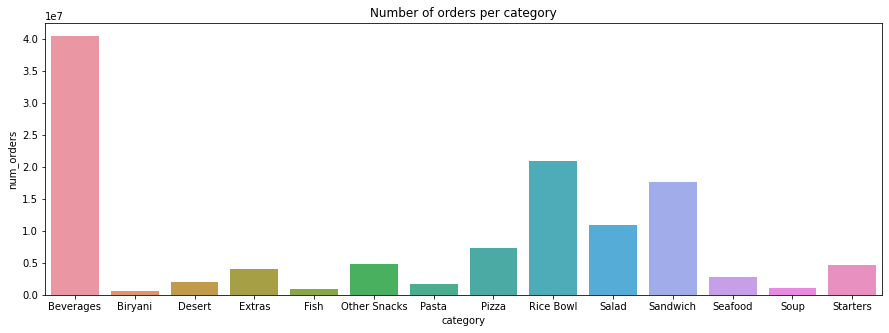

In [28]:
category=data.groupby(['category'])['num_orders'].sum() # grouping category and suming num_orders
category=pd.DataFrame(category)
category=category.reset_index()
category

# ploting category V/S num_orders

plt.figure(figsize=(15,5))
sns.barplot(x='category',y='num_orders',data=category)
plt.title('Number of orders per category')
plt.show()

##### In categories Rice Bowl, Sandwich, Salad and Beverages were most preffered and Fish,Soup and Biryani were among least preffered.

## v) Number of orders based of cuisine

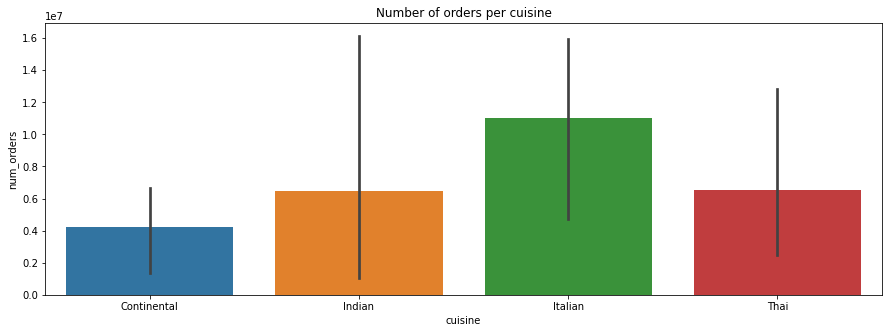

In [29]:
plt.figure(figsize=(15,5))   # ploting cuisine V/S num_orders
sns.barplot(x='cuisine',y='num_orders',data=meal)
plt.title('Number of orders per cuisine')
plt.show()

##### Most preferred is Italian followed by Thai, Indian and Continental.

## vi) Number of orders per center types

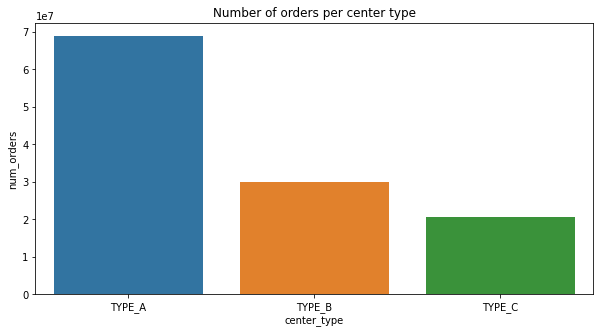

In [30]:
type1=data.groupby(['center_type'])['num_orders'].sum() # grouping center_type V/S num_orders
type1=pd.DataFrame(type1)
type1=type1.reset_index()

# ploting center type V/S num_orders

plt.figure(figsize=(10,5))
sns.barplot(x='center_type',y='num_orders',data=type1)
plt.title('Number of orders per center type')
plt.show()

##### Recieved most orders from Type A center and least from Type C center

## vii) number of orders based on center type and category

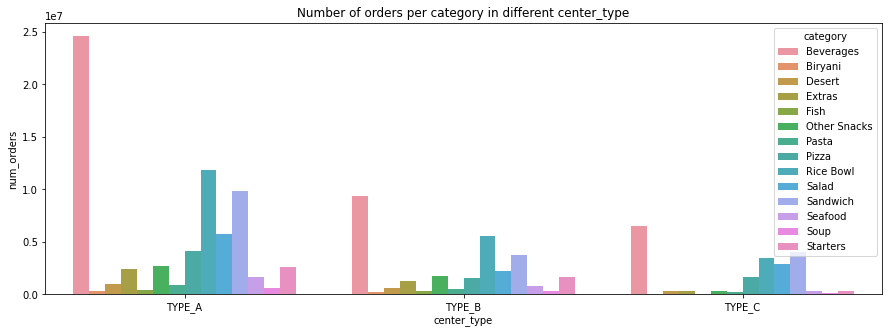

In [31]:
type2=data.groupby(['category','center_type'])['num_orders'].sum() # groupig category and center type suming num_orders
type2=pd.DataFrame(type2)
type2=type2.reset_index()

## ploting center type V/S num_orders and comparing with category

plt.figure(figsize=(15,5))
sns.barplot(x='center_type',y='num_orders',hue='category',data=type2)
plt.title('Number of orders per category in different center_type')
plt.show()

1. We can see most of the orders are from Type_A center in which Beverages has got huge demand and least preffered is Biryani and fish. 
2. In Type_B Beverages are ordered most and Biryani, Soup and fish are least ordered.
3. In Type_C Beverages and Sandwich team are preferred and Biryani, Desert, Extras, Fish, Other Snacks, Seafood, Soup, Starters are least preferred

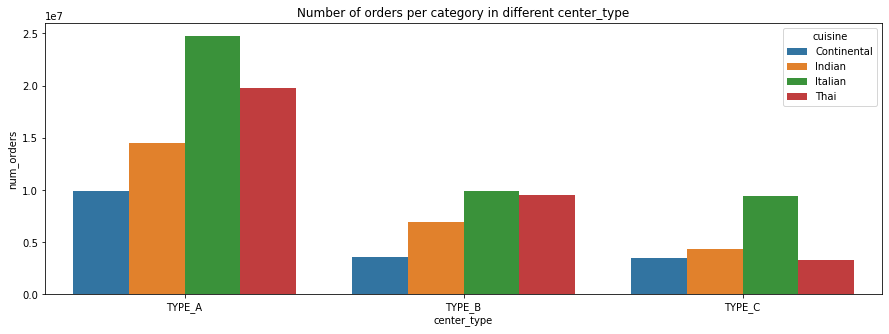

In [29]:
type3=data.groupby(['cuisine','center_type'])['num_orders'].sum() # grouping cuisine and center type and suming num_orders
type3=pd.DataFrame(type3)
type3=type3.reset_index()

# ploting center type V/S num_orders comparing with cuisine

plt.figure(figsize=(15,5))
sns.barplot(x='center_type',y='num_orders',hue='cuisine',data=type3)
plt.title('Number of orders per category in different center_type')
plt.show()

1. Italian in all Center_Types are most liked.
2. Continental among least liked.

## checking Outliers 

In [16]:
num_data=data.select_dtypes(np.number)  # as outliers can only be in numerical data
num_data=num_data.drop('num_orders',axis=1)
num_col=num_data.columns

# The melt function takes data in wide format and stacks a set of columns into a single column of data.
melt=pd.melt(data,value_vars=num_col)
melt.head()

,variable,value
0,id,1379560.0
1,id,1018704.0
2,id,1196273.0
3,id,1116527.0
4,id,1343872.0


<Figure size 1080x1080 with 0 Axes>

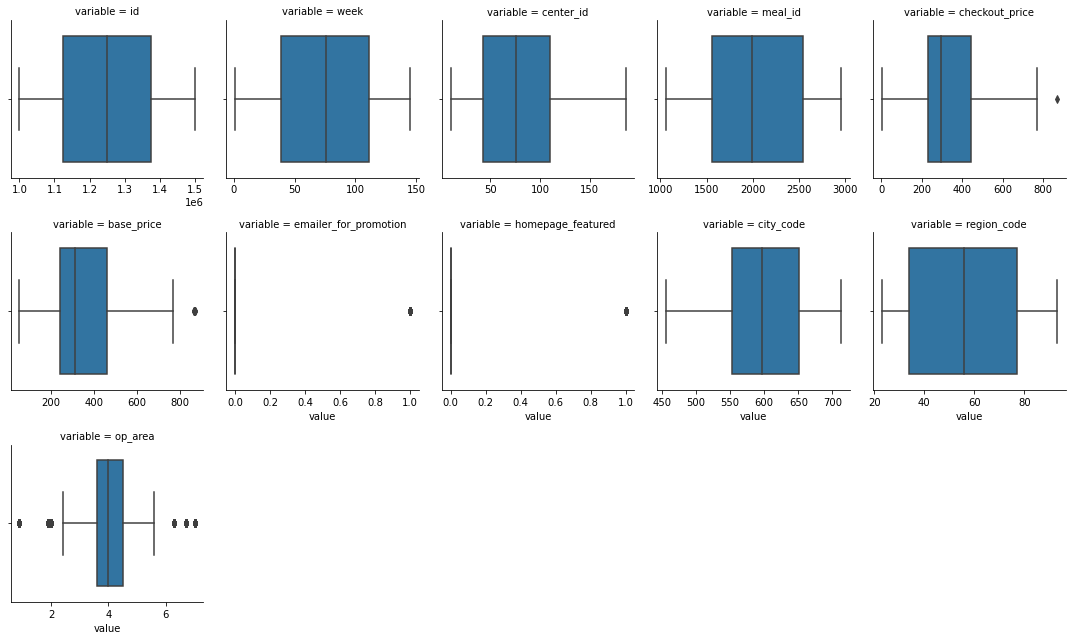

In [17]:
plt.figure(figsize=(15,15))
grid=sns.FacetGrid(melt,col='variable',col_wrap=5,sharex=False,sharey=False)
grid=grid.map(sns.boxplot,'value')


#### op_area,base_price,checkout_price has outliers

## Treating Outliers

## a) IQR method for base price

In [71]:
Q1=data['base_price'].quantile(0.25)
Q3=data['base_price'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-(IQR*1.5)
upper=Q3+(IQR*1.5)
data=data[(data['base_price']>lower) & (data['base_price']<upper)]
len(data) # deleted 8 rows after using outliers 


456540

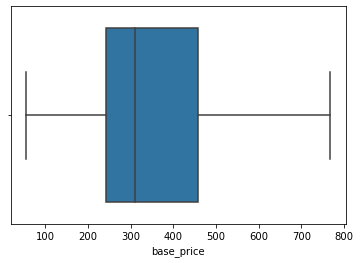

In [72]:
sns.boxplot(data['base_price'])
plt.show()

## b) IQR method for checkout price

In [73]:
Q1=data['checkout_price'].quantile(0.25)
Q3=data['checkout_price'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-IQR*1.5
upper=Q3+IQR*1.5
data=data[(data['checkout_price']>lower) & (data['checkout_price']<upper)]
len(data) 

456540

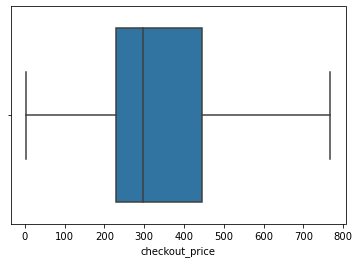

In [74]:
sns.boxplot(data['checkout_price'])
plt.show()

## c) operational area - Flooring and Capping method to treat outliers

In [75]:
Q1=data['op_area'].quantile(0.25) 
Q3=data['op_area'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-IQR*1.5
upper=Q3+IQR*1.5
print(lower)
print(upper)

2.25
5.85


#### we cant afford to delete too many rows so by using Capping method we will treat outliers

In [76]:
data['op_area'] = np.where(data['op_area']<lower,lower,data['op_area'])
data['op_area'] = np.where(data['op_area']>upper,upper,data['op_area'])

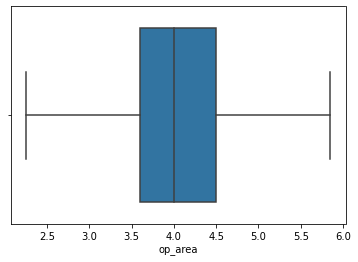

In [77]:
sns.boxplot(data['op_area'])
plt.show()

## After treating outliers

In [25]:
num_data=data.select_dtypes(np.number)  
num_data=num_data.drop('num_orders',axis=1)
num_col=num_data.columns
melt=pd.melt(data,value_vars=num_col)
melt.head()

,variable,value
0,id,1379560.0
1,id,1018704.0
2,id,1196273.0
3,id,1116527.0
4,id,1343872.0


<Figure size 1080x1080 with 0 Axes>

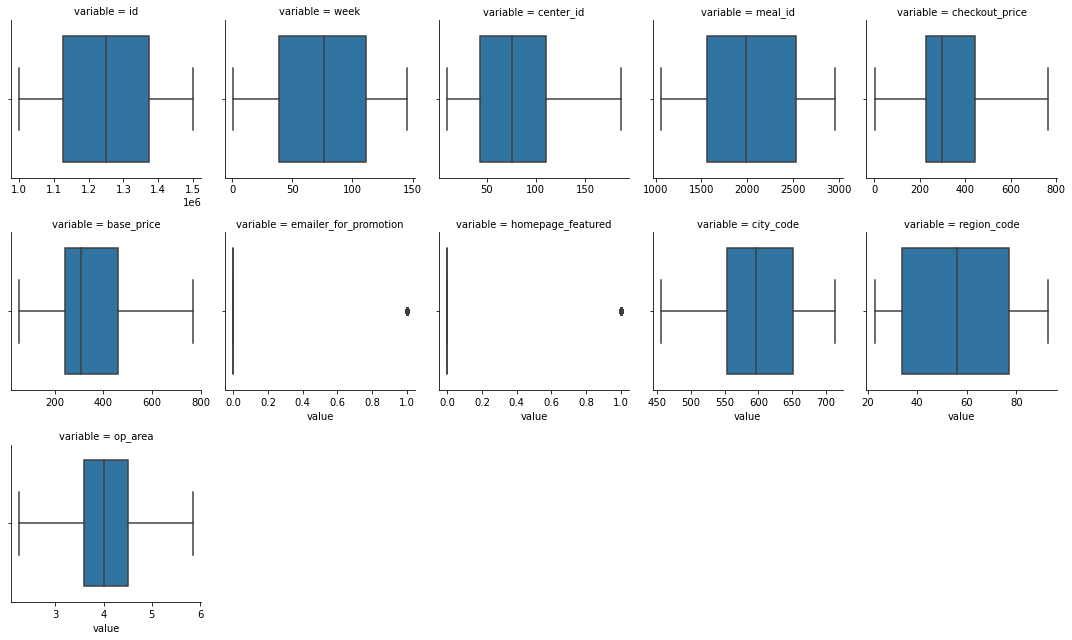

In [26]:
plt.figure(figsize=(15,15))
grid=sns.FacetGrid(melt,col='variable',col_wrap=5,sharex=False,sharey=False)
grid=grid.map(sns.boxplot,'value')


#### After outlier treatment there is no outliers

## statistical test

#### shapiro test

In [66]:
num_data=X.select_dtypes(np.number)

In [20]:
from scipy.stats import shapiro
for i in num_data.columns:
    print(i,'\t',shapiro(num_data[i])[1])

id 	 0.0
week 	 0.0
center_id 	 0.0
meal_id 	 0.0
checkout_price 	 0.0
base_price 	 0.0
emailer_for_promotion 	 0.0
homepage_featured 	 0.0
city_code 	 0.0
region_code 	 0.0
op_area 	 0.0


As we can see data is not normal

#### Chi2 test for independence

In [21]:
## HO= features are independent(category, cuisine)
## H1= features are dependent
alpha=0.05
cat_cuis=pd.crosstab(data['category'],data['cuisine'])
import scipy.stats as st
print(st.chi2_contingency(cat_cuis))
# here as p_value(0.00) < alpha(0.05)
# we reject H0, that is features are dependent on each other

(984736.6954530542, 0.0, 39, array([[28793.59843606, 31545.86384545, 34434.83210672, 33115.70561178],
       [ 4641.10749989,  5084.73248346,  5550.39197004,  5337.76804661],
       [ 6595.35282341,  7225.77633504,  7887.51248521,  7585.35835633],
       [ 3053.39574627,  3345.25768607,  3651.61617821,  3511.73038945],
       [ 2293.53653349,  2512.76655715,  2742.88556315,  2637.81134621],
       [ 6614.4900184 ,  7246.74277829,  7910.39903404,  7607.36816927],
       [ 6235.12327069,  6831.11387392,  7456.7068603 ,  7171.05599509],
       [ 7460.80432383,  8173.95289788,  8922.52299908,  8580.71977921],
       [ 7521.59306085,  8240.5521882 ,  8995.22144828,  8650.63330267],
       [ 6429.87237263,  7044.47826696,  7689.61115127,  7395.03820914],
       [ 7495.25127481,  8211.69249573,  8963.71878696,  8620.3374425 ],
       [ 6058.16050291,  6637.2359399 ,  7245.07359706,  6967.52996013],
       [ 2853.69348797,  3126.46668419,  3412.7883099 ,  3282.05151794],
       [ 6741.02064879

In [22]:
# H0: features are independent(center_type,category)
# H1: features are dependent 
type_cat=pd.crosstab(data['center_type'],data['category'])
print(st.chi2_contingency(type_cat))
# here we reject H0 as p_value(0.0)<alpha(0.05)

(3363.444533811768, 0.0, 26, array([[73638.29668813, 11869.41784291, 16867.30990056,  7808.91844307,
         5865.61363955, 16916.2523919 , 15946.03947518, 19080.66209752,
        19236.1264818 , 16444.1012989 , 19168.75858194, 15493.46537872,
         7298.18915101, 17239.84862882],
       [26352.83624655,  4247.69228545,  6036.2810619 ,  2794.56693389,
         2099.11910895,  6053.79604416,  5706.58727822,  6828.37037718,
         6884.00620318,  5884.82798002,  6859.89734525,  5544.62520699,
         2611.79294257,  6169.60098567],
       [27898.86706532,  4496.88987164,  6390.40903754,  2958.51462303,
         2222.2672515 ,  6408.95156394,  6041.37324659,  7228.9675253 ,
         7287.86731502,  6230.07072108,  7262.34407281,  5869.90941429,
         2765.01790643,  6531.55038551]]))


#### As our data is not normal we cannot use ANOVA so we will use non Parametric test

## Encoding categorical dataset in numerical

In [78]:
num_data=data.select_dtypes(np.number)
cat_data=data.select_dtypes('object')
#cat_data=pd.get_dummies(cat_data)
#data=pd.concat([num_data,cat_data],axis=1)
#data.head()

In [79]:
cat_data=cat_data.drop('center_type',axis=1)
cent=pd.DataFrame(data['center_type'])

In [80]:
cat_data=pd.get_dummies(cat_data)

In [81]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
cent['center_type']=LE.fit_transform(cent['center_type'])

In [82]:
data1=pd.concat([num_data,cat_data,cent],axis=1)

In [83]:
data=data1

In [20]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,0,0,1,2
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,0,0,0,0,0,0,0,0,1,2
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,...,0,0,0,0,0,0,0,0,1,2
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,0,0,0,0,0,0,0,0,1,2
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,...,0,0,0,0,0,0,0,0,1,2


## Checking distribution

<Figure size 1080x1080 with 0 Axes>

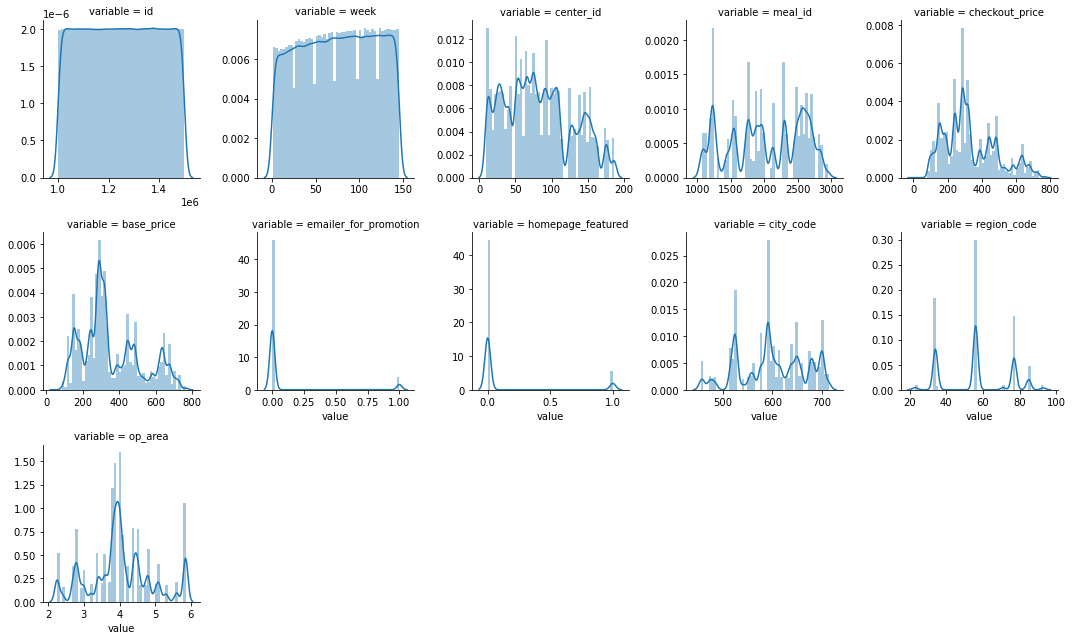

In [34]:
plt.figure(figsize=(15,15))
grid=sns.FacetGrid(melt,col='variable',col_wrap=5,sharex=False,sharey=False)
grid=grid.map(sns.distplot,'value')
plt.show()

## 1)

## train test split

In [84]:
X = data.drop('num_orders',axis=1) # Independent data
y = data['num_orders']             # dependent data

In [85]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)


In [86]:
# H0: Both train test represents data
# H1: Both train test does not represents data
stats.f_oneway(y_train,y_test,y)
# as p_value > alpha we accept H0. i.e. both train test represents data

F_onewayResult(statistic=0.20266604482491696, pvalue=0.8165509239962134)

## scaling dataset

In [23]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [24]:
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

# Power transformation

In [25]:
from sklearn.preprocessing import PowerTransformer
P=PowerTransformer()
X_train=P.fit_transform(X_train)
X_test=P.transform(X_test)

In [26]:
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)
#y_train=y_train.reset_index(drop=True)
#X_train_C=X_train_C.reset_index(drop=True)
#X_test_C=X_test_C.reset_index(drop=True)

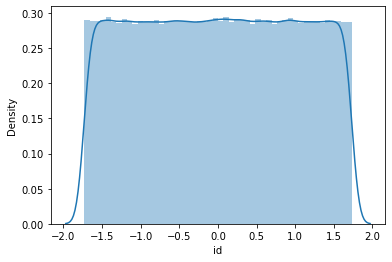

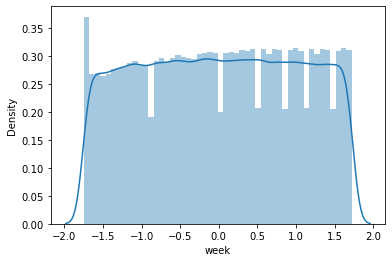

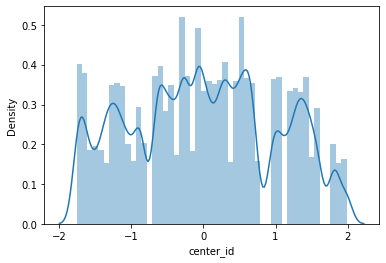

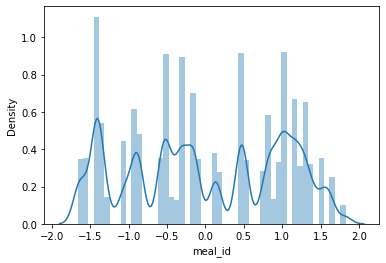

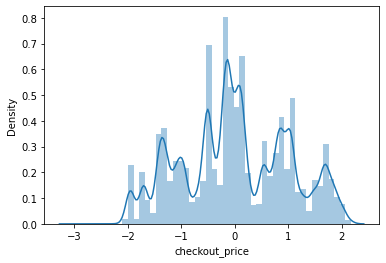

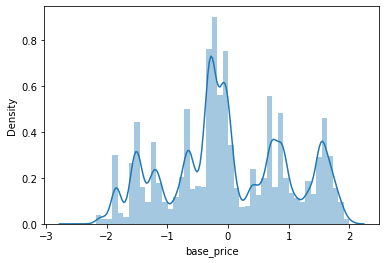

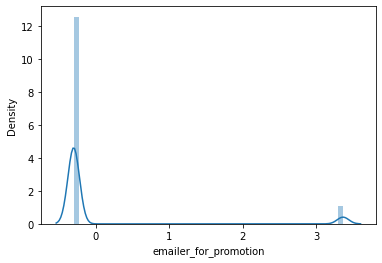

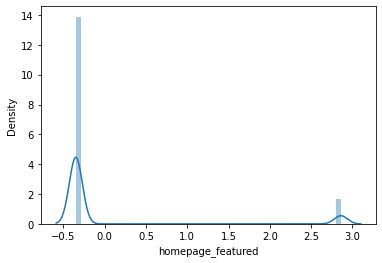

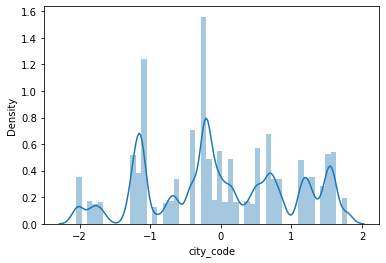

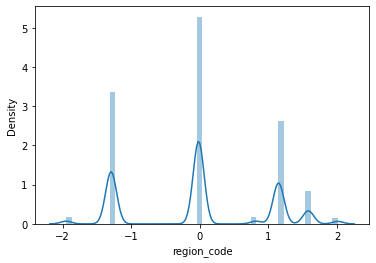

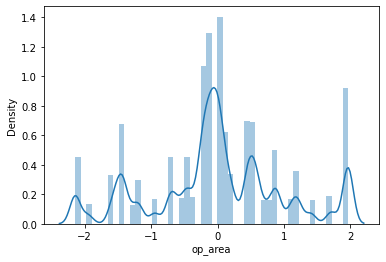

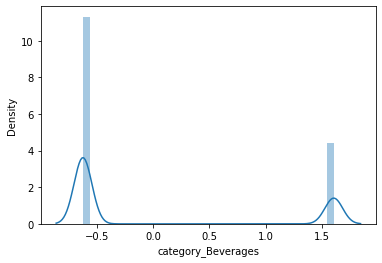

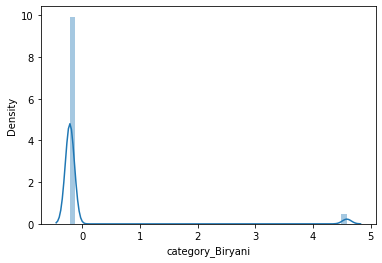

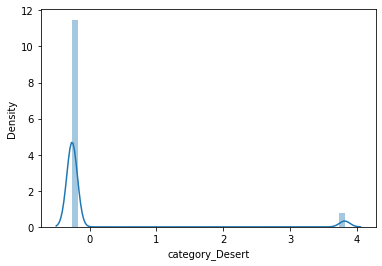

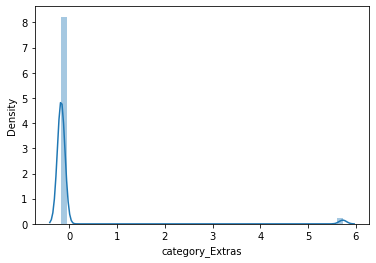

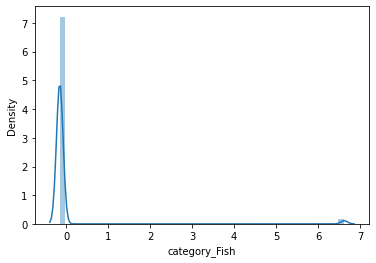

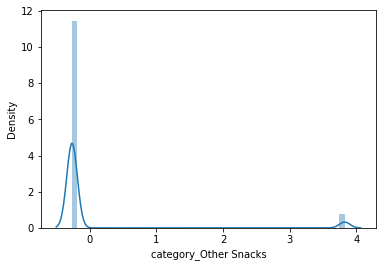

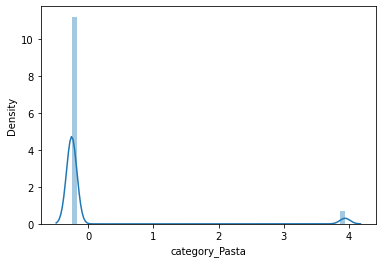

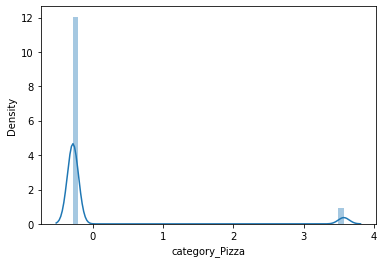

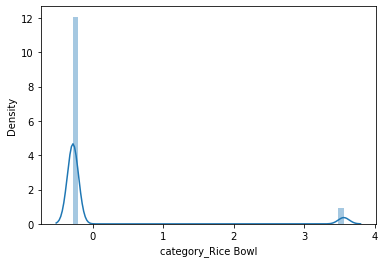

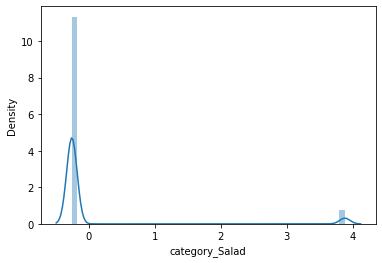

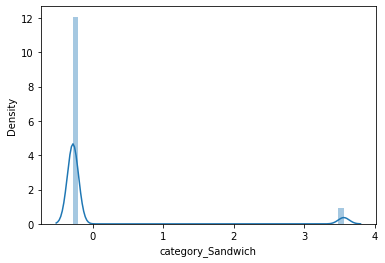

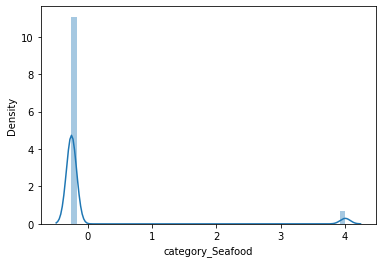

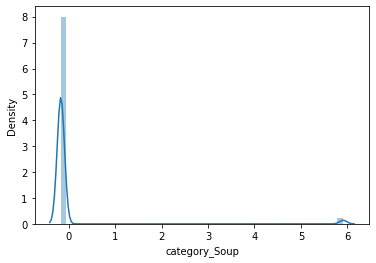

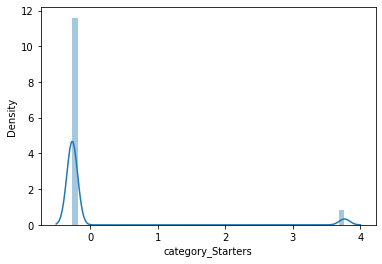

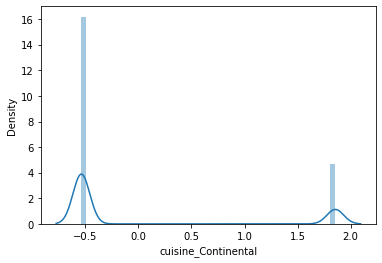

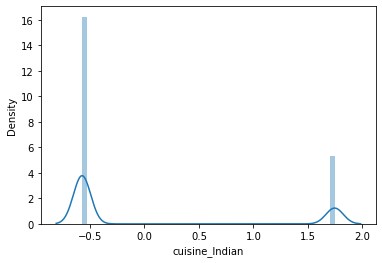

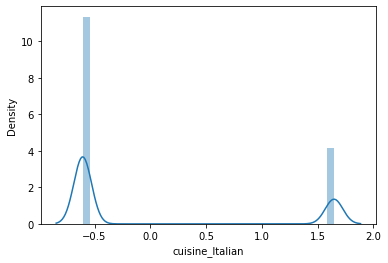

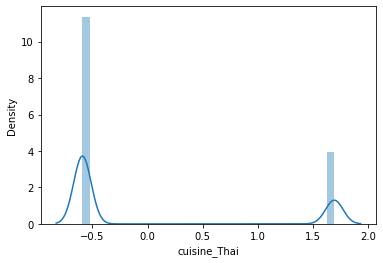

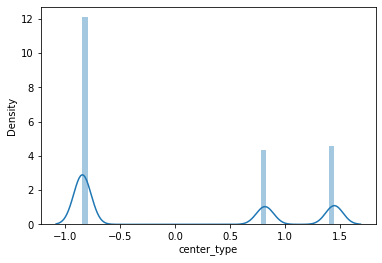

In [94]:
for i in X_train.columns:
    sns.distplot(X_train[i])
    plt.show()

In [28]:
X_train_C=X_train_C.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

## OLS full base model 

In [29]:
import statsmodels.api as sm
X_train_C = sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_C).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_orders   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     8142.
Date:                Fri, 25 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:23:34   Log-Likelihood:            -2.2791e+06
No. Observations:              319578   AIC:                         4.558e+06
Df Residuals:                  319549   BIC:                         4.559e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   262.1207      0.535    489.545      0.000     261.071     263.170
id                        0.1486      0.535      0.277      0.781      -0.901       1.198
week                     -4.3835      0.540     -8.116      0.000      -5.442      -3.325
center_id               -18.4125      0.548    -33.582      0.000     -19.487     -17.338
meal_id                   5.9779      0.626      9.551      0.000       4.751       7.205
checkout_price         -171.3564      2.327    -73.637      0.000    -175.917    -166.795
base_price              106.3037      2.709     39.234      0.000     100.993     111.614
emailer_for_promotion    62.6304      0.665     94.186      0.000      61.327      63.934
homepage_featured        71.4997      0.608    117.546      0.000      70.308      72.692
city_code                 9.0993      0.544     16.726      0.000       8.033      10.166
region_code              10.7557      0.537     20.021      0.000       9.703      11.809
op_area                  77.1750      0.554    139.342      0.000      76.089      78.261
category_Beverages        6.3907      0.890      7.182      0.000       4.647       8.135
category_Biryani         25.9947      0.709     36.665      0.000      24.605      27.384
category_Desert          28.5918      0.748     38.228      0.000      27.126      30.058
category_Extras         -35.4428      0.635    -55.805      0.000     -36.688     -34.198
category_Fish             0.0376      0.597      0.063      0.950      -1.132       1.207
category_Other Snacks   -74.2635      0.672   -110.511      0.000     -75.581     -72.946
category_Pasta          -72.6964      0.715   -101.661      0.000     -74.098     -71.295
category_Pizza           10.6953      0.709     15.081      0.000       9.305      12.085
category_Rice Bowl      165.6223      0.700    236.719      0.000     164.251     166.994
category_Salad            3.8289      0.668      5.734      0.000       2.520       5.138
category_Sandwich        35.4902      0.664     53.462      0.000      34.189      36.791
category_Seafood         -9.8783      0.691    -14.298      0.000     -11.232      -8.524
category_Soup           -64.1418      0.599   -107.123      0.000     -65.315     -62.968
category_Starters       -68.2442      0.686    -99.451      0.000     -69.589     -66.899
cuisine_Continental     -24.9052      1.150    -21.650      0.000     -27.160     -22.651
cuisine_Indian         -110.4584      0.797   -138.663      0.000    -112.020    -108.897
cuisine_Italian          53.8244      0.776     69.370      0.000      52.304      55.345
cuisine_Thai             77.9014      1.001     77.823      0.000      75.939      79.863
center_type              -4.0638      0.550     -7.382      0.000      -5.143      -2.985
=======================

In [30]:
X_test_C=sm.add_constant(X_test)

In [31]:
y_pred_train=model.predict(X_train_C)

In [32]:
y_pred_test=model.predict(X_test_C)


In [33]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train,y_pred_train))
print(mean_absolute_error(y_test,y_pred_test))

163.24177462418672
163.87602479754634


In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
reg=lr.fit(X_train,y_train)
reg.score(X_test,y_test)


0.4140046986974014

In [35]:
X=X.drop(['id','base_price'],axis=1)

In [36]:
vif_data=pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data['vif']=[variance_inflation_factor(X.select_dtypes(np.number).values,i) for i in range(len(X.select_dtypes(np.number).columns))]
vif_data=pd.DataFrame(vif_data)
vif_data['features']=X.columns
vif_data.sort_values(by='vif',ascending=False)

,vif,features
14,inf,category_Other Snacks
12,inf,category_Extras
21,inf,category_Soup
20,inf,category_Seafood
19,inf,category_Sandwich
18,inf,category_Salad
17,inf,category_Rice Bowl
16,inf,category_Pizza
15,inf,category_Pasta
24,inf,cuisine_Indian


## 2)

## droping insignificant data

In [36]:
X = data.drop(['num_orders','id','base_price'],axis=1) # Independent data
y = data['num_orders']             # dependent data

## train test split

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)

## scaling data

In [38]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

## Transformating data

In [39]:
from sklearn.preprocessing import PowerTransformer
P=PowerTransformer()
X_train=P.fit_transform(X_train)
X_test=P.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

## New Model building

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [41]:
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor()
model_ab = AdaBoostRegressor()
model_gb = GradientBoostingRegressor()
model_xg = XGBRegressor()

In [42]:
model_lr.fit(X_train,y_train)
model_dt.fit(X_train,y_train)
model_rf.fit(X_train,y_train)
model_ab.fit(X_train,y_train)
model_gb.fit(X_train,y_train)
model_xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
print('r2 value for linear base model',r2_score(y_train,model_lr.predict(X_train)))
print('r2 value for linear base model test',r2_score(y_test,model_lr.predict(X_test)))

r2 value for linear base model 0.41357137868865723
r2 value for linear base model test 0.4109375755571273


In [44]:
print('r2 value for decision tree base model train',r2_score(y_train,model_dt.predict(X_train)))
print('r2 value for decision tree base model test',r2_score(y_test,model_dt.predict(X_test)))

r2 value for decision tree base model train 1.0
r2 value for decision tree base model test 0.7125826261550423


In [45]:
print('r2 value for random forest base model train',r2_score(y_train,model_rf.predict(X_train)))
print('r2 value for random forest base model test',r2_score(y_test,model_rf.predict(X_test)))

r2 value for random forest base model train 0.980326657636476
r2 value for random forest base model test 0.8528703210870334


In [46]:
print('r2 value for ada boost base model train',r2_score(y_train,model_ab.predict(X_train)))
print('r2 value for ada boost base model test',r2_score(y_test,model_ab.predict(X_test)))

r2 value for ada boost base model train -4.751421956177308
r2 value for ada boost base model test -4.842086326454696


In [47]:
print('r2 value for gradient boosting base model train',r2_score(y_train,model_gb.predict(X_train)))
print('r2 value for gradient boosting base model test',r2_score(y_test,model_gb.predict(X_test)))

r2 value for gradient boosting base model train 0.6639358831556993
r2 value for gradient boosting base model test 0.6610074734398106


In [48]:
print('r2 value for xg boosting base model train',r2_score(y_train,model_xg.predict(X_train)))
print('r2 value for xg boosting base model test',r2_score(y_test,model_xg.predict(X_test)))

r2 value for xg boosting base model train 0.875969889329699
r2 value for xg boosting base model test 0.8476722329634809


In [44]:
from lightgbm import LGBMRegressor

In [45]:
model_lgb=LGBMRegressor()
model_lgb.fit(X_train,y_train)

LGBMRegressor()

In [46]:
print('r2 value for lmb base model train',r2_score(y_train,model_lgb.predict(X_train)))
print('r2 value for lmb base model test',r2_score(y_test,model_lgb.predict(X_test)))

r2 value for lmb base model train 0.8233408685534657
r2 value for lmb base model test 0.8114625808932548


In [47]:
#from sklearn.model_selection import RandomizedSearchCV

In [52]:
from xgboost import XGBRegressor
model_xgb1 = XGBRegressor(
 learning_rate = 0.01,
 eval_metric ='rmse',
    n_estimators = 50000,
    max_depth = 5,
    subsample = 0.8,
    colsample_bytree = 1,
    gamma = 0.5    
 )


model_xgb1.fit(X_train, y_train, eval_metric='rmse', 
          eval_set=[(X_test, y_test)], early_stopping_rounds=500, verbose=100)

[0]	validation_0-rmse:470.59308
[100]	validation_0-rmse:298.59790
[200]	validation_0-rmse:247.53845
[300]	validation_0-rmse:226.37904
[400]	validation_0-rmse:214.91859
[500]	validation_0-rmse:207.95329
[600]	validation_0-rmse:202.29938
[700]	validation_0-rmse:197.68574
[800]	validation_0-rmse:194.44795
[900]	validation_0-rmse:191.85776
[1000]	validation_0-rmse:189.55719
[1100]	validation_0-rmse:187.40465
[1200]	validation_0-rmse:185.57286
[1300]	validation_0-rmse:183.96146
[1400]	validation_0-rmse:182.56224
[1500]	validation_0-rmse:181.17827
[1600]	validation_0-rmse:179.81880
[1700]	validation_0-rmse:178.57240
[1800]	validation_0-rmse:177.27125
[1900]	validation_0-rmse:176.21379
[2000]	validation_0-rmse:175.22795
[2100]	validation_0-rmse:174.24564
[2200]	validation_0-rmse:173.28630
[2300]	validation_0-rmse:172.20033
[2400]	validation_0-rmse:171.24771
[2500]	validation_0-rmse:170.38080
[2600]	validation_0-rmse:169.59744
[2700]	validation_0-rmse:168.72745
[2800]	validation_0-rmse:167.860

[23100]	validation_0-rmse:133.87175
[23200]	validation_0-rmse:133.83807
[23300]	validation_0-rmse:133.79547
[23400]	validation_0-rmse:133.76410
[23500]	validation_0-rmse:133.73537
[23600]	validation_0-rmse:133.70911
[23700]	validation_0-rmse:133.67703
[23800]	validation_0-rmse:133.65111
[23900]	validation_0-rmse:133.61540
[24000]	validation_0-rmse:133.58464
[24100]	validation_0-rmse:133.55749
[24200]	validation_0-rmse:133.53087
[24300]	validation_0-rmse:133.50205
[24400]	validation_0-rmse:133.46699
[24500]	validation_0-rmse:133.43631
[24600]	validation_0-rmse:133.41206
[24700]	validation_0-rmse:133.37209
[24800]	validation_0-rmse:133.32675
[24900]	validation_0-rmse:133.30106
[25000]	validation_0-rmse:133.27156
[25100]	validation_0-rmse:133.25044
[25200]	validation_0-rmse:133.22569
[25300]	validation_0-rmse:133.21133
[25400]	validation_0-rmse:133.18346
[25500]	validation_0-rmse:133.15013
[25600]	validation_0-rmse:133.13008
[25700]	validation_0-rmse:133.10861
[25800]	validation_0-rmse:13

[45900]	validation_0-rmse:129.80986
[46000]	validation_0-rmse:129.80359
[46100]	validation_0-rmse:129.79039
[46200]	validation_0-rmse:129.77853
[46300]	validation_0-rmse:129.76550
[46400]	validation_0-rmse:129.75465
[46500]	validation_0-rmse:129.75046
[46600]	validation_0-rmse:129.73621
[46700]	validation_0-rmse:129.72830
[46800]	validation_0-rmse:129.71759
[46900]	validation_0-rmse:129.71066
[47000]	validation_0-rmse:129.70122
[47100]	validation_0-rmse:129.68532
[47200]	validation_0-rmse:129.67137
[47300]	validation_0-rmse:129.66071
[47400]	validation_0-rmse:129.65390
[47500]	validation_0-rmse:129.64191
[47600]	validation_0-rmse:129.63667
[47700]	validation_0-rmse:129.62973
[47800]	validation_0-rmse:129.61981
[47900]	validation_0-rmse:129.60414
[48000]	validation_0-rmse:129.59276
[48100]	validation_0-rmse:129.58962
[48200]	validation_0-rmse:129.57378
[48300]	validation_0-rmse:129.56818
[48400]	validation_0-rmse:129.56253
[48500]	validation_0-rmse:129.55574
[48600]	validation_0-rmse:12

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0.5, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50000, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [55]:
best_i = (model_xgb1.get_booster().best_iteration)
best_i

49989

In [56]:
xgb_model = XGBRegressor(
     
     learning_rate = 0.01,
   
    n_estimators = best_i,
    max_depth = 5,
    subsample = 0.8,
    colsample_bytree = 1,
    gamma = 0.5)

In [57]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=49989, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
print('r2 value for xgb_model base model train',r2_score(y_train,xgb_model.predict(X_train)))
print('r2 value for xgb_model base model test',r2_score(y_test,xgb_model.predict(X_test)))

r2 value for xgb_model base model train 0.9516804312335111
r2 value for xgb_model base model test 0.8928266135800875


In [51]:

# Number of trees in random forest
n_estimators = [i for i in range(10,100,10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [i for i in range(10,100,10)]

# Minimum number of samples required to split a node
min_samples_split = [i for i in range(10,100,10)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }

In [ ]:
#ridge=Ridge()
parameters={'alpha':[i for i in range(50,100)]}
rf_regressor=GridSearchCV(estimator=model_rf,param_grid=grid,scoring='r2',cv=3) 
rf_regressor.fit(X_train,y_train)

In [80]:
print(rf_regressor.best_params_)
print(rf_regressor.best_score_)

{'alpha': 89}
0.4145149201649936


In [71]:
ridge=Ridge(alpha=100)

In [72]:
ridge.fit(X_train,y_train)

Ridge(alpha=100)

In [73]:
print(r2_score(y_train,ridge.predict(X_train)))

0.413575298929175


In [74]:
print(r2_score(y_test,ridge.predict(X_test)))

0.4109537726826522


In [ ]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV lasso=Lasso() 
parameters={'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2_score',cv=5)  lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_) print(lasso_regressor.best_score_)

In [57]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 500,10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 15, 30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'min_samples_split': [2, 5, 15, 30], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [58]:
rf_randomcv=RandomizedSearchCV(estimator=model_rf,param_distributions=random_grid,n_iter,cv=3,
                               random_state=1,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

MemoryError: Unable to allocate 832. KiB for an array with shape (106526, 1, 1) and data type float64